In [2]:
import os
import gc
import pandas as pd
from tqdm.notebook import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
import re
import numpy as np

In [ ]:
# path_news = './stock/vn/business_news/'
# list_file_news = [os.path.join(path_news, filename) for filename in os.listdir(path_news) if os.path.isfile(os.path.join(path_news, filename))]

In [3]:
path_news = './stock/vn/business_news_en/'
list_file_news = [os.path.join(path_news, filename) for filename in os.listdir(path_news) if os.path.isfile(os.path.join(path_news, filename))]

In [10]:
import requests
import urllib

def translate(text):
    f = {'key' : 'trnsl.1.1.20210911T110121Z.b17804374c5bae96.39b65931bf5bb5b7faa7bf11f1f811eba5bd9a1b', 
         'text' : text,
         'lang' : 'vi-en',
         'format' : 'plain'
        }

    url = 'https://translate.yandex.net/api/v1.5/tr.json/translate?' + urllib.parse.urlencode(f)
    
    count_retry = 5
    while(count_retry >= 0):
        try:
            response = requests.get(url)
            print(response.text)
            return response.json()['text'][0]
        except:
            print(f'failed. Remaining retry {count_retry}...')
            count_retry -= 1
        
    return np.NaN

In [11]:
translate("Việt Nam đất nước tôi")

{"code":200,"lang":"vi-en","text":["Vietnam, my country"]}


'Vietnam, my country'

In [12]:
def translate_df(df, symbol):
    print(df.shape)
    total_row = len(df)
    row_completed = 0
    if 'article_concat_en' not in df.columns:
        df['article_concat_en'] = ''
    for index, row in df.iterrows():
        if not pd.isnull(row['article_concat_en']):
            row_completed += 1
            continue
        text_translated = translate(row['article_concat_en'])
        df.loc[df.index == index, 'article_concat_en'] = text_translated
        row_completed += 1
        print(text_translated)
        print(f'{symbol} - {index} done, {row_completed}/{total_row} completed')
        
    return df

In [8]:
list_vn30 = pd.read_csv('list_vn_hsx30.csv')['symbol'].unique()

In [10]:
list_vn30

array(['ACB', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG',
       'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'PNJ', 'POW',
       'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIC', 'VJC',
       'VNM', 'VPB', 'VRE'], dtype=object)

In [13]:
filter_start_time = '2009-06-01'

for file in tqdm(list_file_news):
    basename = os.path.basename(file)
    os.path.splitext(basename)
    file_name, file_extension = os.path.splitext(basename)
    if file_extension != '.csv':
        continue
    
    if file_name not in list_vn30:
        continue
        
    file_translated = f'./stock/vn/business_news_en2/{basename}'
    if os.path.isfile(file_translated):
        continue
    
    print(f'start processing file {basename}')
    
    df_news = pd.read_csv(file)#[['time', 'title_name', 'para']]
#     break
    
#     df_news.loc[df_news['time'].str.contains('trước'), 'time'] = 'Aug 06, 2021'
    
#     df_news['para'] = df_news['para'].str.replace('Investing.com', '', regex=False)
#     df_news['para'] = df_news['para'].str.replace('Vietstock', '', regex=False)
    
#     df_news['Date'] = pd.to_datetime(df_news['time'])
#     df_news = df_news[df_news['Date'] >= filter_start_time]
#     df_news.drop_duplicates(subset=['title_name'], keep='first', inplace=True)
#     df_news.drop('time', axis=1, inplace=True)
#     df_news['symbol'] = file_name
#     df_news.rename(columns={'title_name' : 'article_title'}, inplace=True)
#     df_news.rename(columns={'para' : 'article_abstract'}, inplace=True)
#     df_news = df_news[['symbol', 'Date', 'article_title', 'article_abstract']]
    
#     df_news[['article_title', 'article_abstract']] = df_news[['article_title', 'article_abstract']].fillna('')
#     df_news['article_concat'] = df_news['article_title'] + ' ' + df_news['article_abstract']
#     df_news['article_concat'] = df_news['article_concat'].str.strip()
    
    df_news = translate_df(df_news, symbol=file_name)
    
    df_news.to_csv(file_translated, index=False)

  0%|          | 0/31 [00:00<?, ?it/s]

start processing file KDH.csv
(315, 6)
start processing file MBB.csv
(965, 6)
start processing file MSN.csv
(1041, 6)
start processing file MWG.csv
(615, 6)
start processing file NVL.csv
(758, 6)
start processing file PDR.csv
(267, 6)
start processing file PLX.csv
(684, 6)
start processing file PNJ.csv
(539, 6)
start processing file POW.csv
(577, 6)
start processing file SAB.csv
(766, 6)
start processing file SSI.csv
(1035, 6)
start processing file STB.csv
(1158, 6)
start processing file TPB.csv
(8, 6)
start processing file VCB.csv
(2215, 6)
start processing file VHM.csv
(1433, 6)
start processing file VIC.csv
(1604, 6)
start processing file VJC.csv
(734, 6)
start processing file VNM.csv
(1530, 6)
start processing file VPB.csv
(1188, 6)
start processing file VRE.csv
(882, 6)


In [ ]:
df.head()

In [54]:
df.head()

,symbol,Date,article_title,article_abstract,article_concat
0,AAA,2021-12-08,Vì sao Mỹ kêu gọi OPEC tăng sản lượng khai thá...,- Vì sao Mỹ kêu gọi OPEC tăng sản lượng khai ...,Vì sao Mỹ kêu gọi OPEC tăng sản lượng khai thá...
1,AAA,2021-12-08,Các doanh nghiệp chốt quyền nhận cổ tức bằng t...,– Dưới đây là thông tin về các doanh nghiệp d...,Các doanh nghiệp chốt quyền nhận cổ tức bằng t...
2,AAA,2021-10-08,Phân tích kỹ thuật phiên chiều 10/08: VN-Index...,- Phân tích kỹ thuật phiên chiều 10/08: VN-In...,Phân tích kỹ thuật phiên chiều 10/08: VN-Index...
3,AAA,2021-10-08,Nhựa An Phát Xanh dự kiến phát hành gần 30 tri...,- CTCP Nhựa An Phát Xanh (HM:AAA) đã thông qu...,Nhựa An Phát Xanh dự kiến phát hành gần 30 tri...
4,AAA,2021-02-08,Doanh thu quý II Nhựa An Phát Xanh tăng 54%,- CTCP Nhựa An Phát Xanh (HM:AAA) vừa công bố...,Doanh thu quý II Nhựa An Phát Xanh tăng 54% -...


In [57]:
df['article_concat'].str.len().sum()

12243678

In [3]:
def pos_tag_text(text):
    stop_words = set(stopwords.words('english'))
    pos_dict = {
        'J' : wordnet.ADJ, 
        'V' : wordnet.VERB, 
        'N' : wordnet.NOUN, 
        'R' : wordnet.ADV
    }

    text = re.sub('[^A-Za-z]+', ' ', text)
    token = word_tokenize(text.lower())
    words_list = [w for w in token if not w in stop_words]
    pos_tagged = pos_tag(words_list)
    pos_data = [(w, pos_dict.get(p[0])) for w, p in pos_tagged]
    
    return pos_data

In [4]:
def lemmatize_text(pos_data):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_rew = " "
    for word, pos in pos_data:
        if pos is None:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
            
    return lemma_rew.strip()

In [5]:
def sentiwordnet_analysis(pos_data):
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens_count = 0
    score_pos = 0
    score_neg = 0
    score_obj = 0
    for word, pos in pos_data:
        if not pos:
            continue
            
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            
        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        score_pos += swn_synset.pos_score()
        score_neg += swn_synset.neg_score()
        score_obj += swn_synset.obj_score()
        
        tokens_count += 1
    
    score_total = score_pos - score_neg
    
    return (score_pos, score_neg, score_obj, score_total)

In [6]:
def make_sentiment_features(df):
    analyzer = SentimentIntensityAnalyzer()
    
    df['article_concat_pos_tag'] = df['article_concat'].apply(pos_tag_text)
    df['article_concat_lemma'] = df['article_concat_pos_tag'].apply(lemmatize_text)
    
    df['stock_news_vader_neg'] = df.apply(lambda x: analyzer.polarity_scores(x['article_concat_lemma'])['neg'], axis=1)
    df['stock_news_vader_pos'] = df.apply(lambda x: analyzer.polarity_scores(x['article_concat_lemma'])['pos'], axis=1)
    df['stock_news_vader_neu'] = df.apply(lambda x: analyzer.polarity_scores(x['article_concat_lemma'])['neu'], axis=1)
    df['stock_news_vader_compound'] = df.apply(lambda x: analyzer.polarity_scores(x['article_concat_lemma'])['compound'], axis=1)
    
    df['stock_news_wordnet_pos'] = df.apply(lambda x: sentiwordnet_analysis(x['article_concat_pos_tag'])[0], axis=1)
    df['stock_news_wordnet_neg'] = df.apply(lambda x: sentiwordnet_analysis(x['article_concat_pos_tag'])[1], axis=1)
    df['stock_news_wordnet_obj'] = df.apply(lambda x: sentiwordnet_analysis(x['article_concat_pos_tag'])[2], axis=1)
    df['stock_news_wordnet_total'] = df.apply(lambda x: sentiwordnet_analysis(x['article_concat_pos_tag'])[3], axis=1)
    
    return df

In [7]:
df = None
filter_start_time = '2005-01-01'

for file in tqdm(list_file_news):
    basename = os.path.basename(file)
    os.path.splitext(basename)
    file_name, file_extension = os.path.splitext(basename)
    if file_extension != '.csv':
        continue
        
    df_news = pd.read_csv(file)[['time', 'title_name', 'para']]
    
    df_news.loc[df_news['time'].str.contains('ago'), 'time'] = 'Aug 06, 2021'
    df_news['Date'] = pd.to_datetime(df_news['time'])
    df_news = df_news[df_news['Date'] >= filter_start_time]
    df_news.drop_duplicates(subset=['title_name'], keep='first', inplace=True)
    df_news.drop('time', axis=1, inplace=True)
    df_news['symbol'] = file_name
    df_news.rename(columns={'title_name' : 'article_title'}, inplace=True)
    df_news.rename(columns={'para' : 'article_abstract'}, inplace=True)
    df_news = df_news[['symbol', 'Date', 'article_title', 'article_abstract']]
    
    df_news[['article_title', 'article_abstract']] = df_news[['article_title', 'article_abstract']].fillna('')
    df_news['article_concat'] = df_news['article_title'] + ' ' + df_news['article_abstract']

    df_news = make_sentiment_features(df_news)
    
    if df is None:
        df = df_news.copy()
    else:
        df = pd.concat([df, df_news], axis=0)
    
    del df_news
    gc.collect()

  0%|          | 0/498 [00:00<?, ?it/s]

In [8]:
df.head()

,symbol,Date,article_title,article_abstract,article_concat,article_concat_pos_tag,article_concat_lemma,stock_news_vader_neg,stock_news_vader_pos,stock_news_vader_neu,stock_news_vader_compound,stock_news_wordnet_pos,stock_news_wordnet_neg,stock_news_wordnet_obj,stock_news_wordnet_total
0,A,2021-07-29,Will Agilent Technologies Continue to Surge Hi...,Agilent (A) has generated significant returns ...,Will Agilent Technologies Continue to Surge Hi...,"[(agilent, n), (technologies, n), (continue, v...",agilent technology continue surge high agilent...,0.000,0.241,0.759,0.5719,1.500,1.250,15.250,0.250
1,A,2021-07-13,3 Large-Cap Stocks to Buy for the Long Term,Because the stock market is expected to remain...,3 Large-Cap Stocks to Buy for the Long Term Be...,"[(large, a), (cap, n), (stocks, n), (buy, v), ...",large cap stock buy long term stock market exp...,0.116,0.000,0.884,-0.4404,1.500,1.625,16.875,-0.125
2,A,2021-07-12,KeyBanc Stick to Their Buy Rating for Agilent,KeyBanc analyst Paul Knight maintained a Buy r...,KeyBanc Stick to Their Buy Rating for Agilent ...,"[(keybanc, n), (stick, n), (buy, n), (rating, ...",keybanc stick buy rating agilent keybanc analy...,0.000,0.087,0.913,0.2960,2.125,0.625,14.250,1.500
3,A,2021-06-25,2 Healthcare Stocks That Could Grow Your Portf...,The healthcare industry has attracted much att...,2 Healthcare Stocks That Could Grow Your Portf...,"[(healthcare, n), (stocks, n), (could, None), ...",healthcare stock could grow portfolio healthca...,0.058,0.096,0.846,0.2500,0.875,1.000,17.125,-0.125
4,A,2021-06-04,3 Must-Own Healthcare Stocks for June,Despite the healthcare system’s limitations ha...,3 Must-Own Healthcare Stocks for June Despite ...,"[(must, None), (healthcare, v), (stocks, n), (...",must healthcare stock june despite healthcare ...,0.062,0.276,0.662,0.6692,1.125,0.250,13.625,0.875


In [9]:
df.describe()

,stock_news_vader_neg,stock_news_vader_pos,stock_news_vader_neu,stock_news_vader_compound,stock_news_wordnet_pos,stock_news_wordnet_neg,stock_news_wordnet_obj,stock_news_wordnet_total
count,288565.000000,288565.000000,288565.000000,288565.000000,288565.000000,288565.000000,288565.000000,288565.000000
mean,0.075769,0.118148,0.806077,0.144212,0.761158,0.626431,18.897681,0.134727
std,0.096249,0.102844,0.125081,0.515180,0.609514,0.587094,3.922670,0.777437
min,0.000000,0.000000,0.189000,-0.986700,0.000000,0.000000,0.000000,-4.375000
25%,0.000000,0.000000,0.718000,-0.226300,0.250000,0.125000,16.625000,-0.250000
50%,0.044000,0.099000,0.814000,0.202300,0.625000,0.500000,19.125000,0.125000
75%,0.129000,0.180000,0.906000,0.585900,1.125000,1.000000,21.500000,0.625000
max,0.695000,0.811000,1.000000,0.981600,6.375000,4.875000,34.000000,6.250000


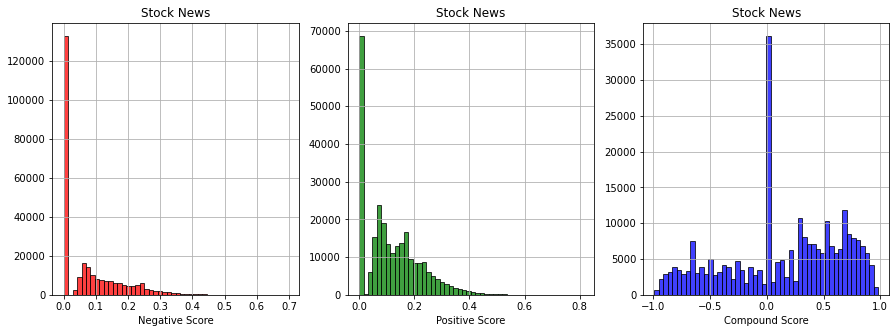

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(df['stock_news_vader_neg'], 
         50, 
         color = 'r', 
         edgecolor = 'black',
         alpha=0.75,)
plt.xlabel('Negative Score')
plt.title('Stock News')
plt.grid(True)
plt.subplot(132)
plt.hist(df['stock_news_vader_pos'], 
         50, 
         color='g',
         edgecolor = 'black', 
         alpha=0.75,)
plt.xlabel('Positive Score')
plt.title('Stock News')
plt.grid(True)
plt.subplot(133)
plt.hist(df['stock_news_vader_compound'], 
         50, 
         color='b',
         edgecolor = 'black', 
         alpha=0.75)
plt.xlabel('Compound Score')
plt.title('Stock News')
plt.grid(True)
plt.show()

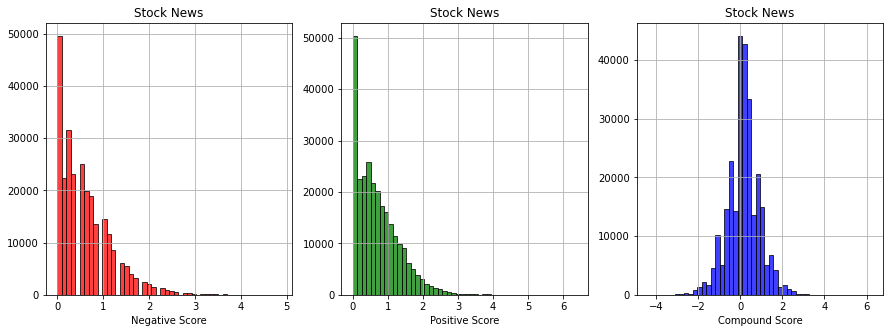

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(df['stock_news_wordnet_neg'], 
         50, 
         color = 'r', 
         edgecolor = 'black',
         alpha=0.75,)
plt.xlabel('Negative Score')
plt.title('Stock News')
plt.grid(True)
plt.subplot(132)
plt.hist(df['stock_news_wordnet_pos'], 
         50, 
         color='g',
         edgecolor = 'black', 
         alpha=0.75,)
plt.xlabel('Positive Score')
plt.title('Stock News')
plt.grid(True)
plt.subplot(133)
plt.hist(df['stock_news_wordnet_total'], 
         50, 
         color='b',
         edgecolor = 'black', 
         alpha=0.75)
plt.xlabel('Compound Score')
plt.title('Stock News')
plt.grid(True)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268723 entries, 0 to 540
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   symbol                     268723 non-null  object        
 1   Date                       268723 non-null  datetime64[ns]
 2   article_title              268723 non-null  object        
 3   article_abstract           268723 non-null  object        
 4   article_concat             268723 non-null  object        
 5   article_concat_pos_tag     268723 non-null  object        
 6   article_concat_lemma       268723 non-null  object        
 7   stock_news_vader_neg       268723 non-null  float64       
 8   stock_news_vader_pos       268723 non-null  float64       
 9   stock_news_vader_neu       268723 non-null  float64       
 10  stock_news_vader_compound  268723 non-null  float64       
 11  stock_news_wordnet_pos     268723 non-null  float64    

In [10]:
df.groupby(['symbol', 'Date']).size().reset_index(name='count')

,symbol,Date,count
0,A,2015-11-16,1
1,A,2016-07-28,1
2,A,2016-08-01,1
3,A,2016-08-18,1
4,A,2016-11-15,1
...,...,...,...
124340,ZTS,2021-07-22,1
124341,ZTS,2021-07-30,1
124342,ZTS,2021-08-04,1
124343,ZTS,2021-08-05,2


In [16]:
df[['symbol', 'Date', 
    'stock_news_vader_neg', 'stock_news_vader_pos', 'stock_news_vader_neu', 'stock_news_vader_compound',
    'stock_news_wordnet_pos', 'stock_news_wordnet_neg', 'stock_news_wordnet_obj', 'stock_news_wordnet_total']] \
.head()

,symbol,Date,stock_news_vader_neg,stock_news_vader_pos,stock_news_vader_neu,stock_news_vader_compound,stock_news_wordnet_pos,stock_news_wordnet_neg,stock_news_wordnet_obj,stock_news_wordnet_total
0,A,2021-07-29,0.000,0.241,0.759,0.5719,1.500,1.250,15.250,0.250
1,A,2021-07-13,0.116,0.000,0.884,-0.4404,1.500,1.625,16.875,-0.125
2,A,2021-07-12,0.000,0.087,0.913,0.2960,2.125,0.625,14.250,1.500
3,A,2021-06-25,0.058,0.096,0.846,0.2500,0.875,1.000,17.125,-0.125
4,A,2021-06-04,0.062,0.276,0.662,0.6692,1.125,0.250,13.625,0.875


In [12]:
df.groupby(['symbol', 'Date']) \
    .agg(stock_news_in_day=('Date', 'count'),
         stock_news_vader_neg=('stock_news_vader_neg', 'sum'),
         stock_news_vader_pos=('stock_news_vader_pos', 'sum'),
         stock_news_vader_neu=('stock_news_vader_neu', 'sum'),
         stock_news_vader_compound=('stock_news_vader_compound', 'sum'),
         stock_news_wordnet_pos=('stock_news_wordnet_pos', 'sum'),
         stock_news_wordnet_neg=('stock_news_wordnet_neg', 'sum'),
         stock_news_wordnet_obj=('stock_news_wordnet_obj', 'sum'),
         stock_news_wordnet_total=('stock_news_wordnet_total', 'sum'),) \
    .reset_index() \
    .to_csv('./exported_data/news_sentiment_analysis/us_stock_news_sentiment_analysis.csv', index=False)